In [62]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import numpy as np

In [63]:
f=pd.read_csv('Desktop/data storage/ShanghaiPM20100101_20151231_Test - Test.csv')

In [64]:
f=pd.DataFrame(f)

In [65]:
# an overview first several rows
f.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,52184,2015,12,15,7,4,269.0,269.0,276.0,1,70.27,1025,6,NW,176,0.0,0.0
1,52185,2015,12,15,8,4,261.0,251.0,271.0,0,61.01,1025,7,NW,181,0.0,0.0
2,52186,2015,12,15,9,4,247.0,238.0,266.0,1,61.26,1026,8,NW,184,0.0,0.0
3,52187,2015,12,15,10,4,236.0,224.0,243.0,1,61.26,1026,8,NW,188,0.0,0.0
4,52188,2015,12,15,11,4,202.0,188.0,214.0,-1,49.51,1026,9,NW,194,0.0,0.0


In [66]:
#see the size of data, isnull()?, how many observations 
f.shape

(401, 17)

In [67]:
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 17 columns):
No               401 non-null int64
year             401 non-null int64
month            401 non-null int64
day              401 non-null int64
hour             401 non-null int64
season           401 non-null int64
PM_Jingan        395 non-null float64
PM_US Post       376 non-null float64
PM_Xuhui         397 non-null float64
DEWP             401 non-null int64
HUMI             401 non-null float64
PRES             401 non-null int64
TEMP             401 non-null int64
cbwd             401 non-null object
Iws              401 non-null int64
precipitation    257 non-null float64
Iprec            257 non-null float64
dtypes: float64(6), int64(10), object(1)
memory usage: 53.3+ KB


In [68]:
# for continuous variables ( numeric V)
f.describe()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,401.000000,401.0,401.0,401.000000,401.000000,401.0,395.000000,376.000000,397.000000,401.000000,401.000000,401.000000,401.000000,401.000000,257.000000,257.000000
mean,52384.000000,2015.0,12.0,23.139651,11.648379,4.0,91.734177,92.728723,94.355164,1.915212,70.098853,1028.765586,7.521197,40.855362,0.014786,0.063813
std,115.902977,0.0,0.0,4.831195,6.893370,0.0,64.498988,61.821600,65.834521,5.650468,18.633188,4.863118,3.242711,62.791074,0.093203,0.416334
min,52184.000000,2015.0,12.0,15.000000,0.000000,4.0,15.000000,21.000000,16.000000,-14.000000,22.460000,1020.000000,-1.000000,0.000000,0.000000,0.000000
25%,52284.000000,2015.0,12.0,19.000000,6.000000,4.0,40.000000,45.000000,43.000000,-1.000000,56.720000,1025.000000,5.000000,4.000000,0.000000,0.000000
50%,52384.000000,2015.0,12.0,23.000000,12.000000,4.0,65.000000,68.500000,69.000000,3.000000,71.070000,1029.000000,8.000000,13.000000,0.000000,0.000000
75%,52484.000000,2015.0,12.0,27.000000,18.000000,4.0,141.000000,139.000000,141.000000,6.000000,86.990000,1034.000000,10.000000,41.000000,0.000000,0.000000
max,52584.000000,2015.0,12.0,31.000000,23.000000,4.0,279.000000,284.000000,276.000000,12.000000,100.000000,1038.000000,16.000000,271.000000,0.900000,3.500000


In [69]:
# for one variable: HUMI 
f.describe().loc['min':'max','HUMI']

min     22.46
25%     56.72
50%     71.07
75%     86.99
max    100.00
Name: HUMI, dtype: float64

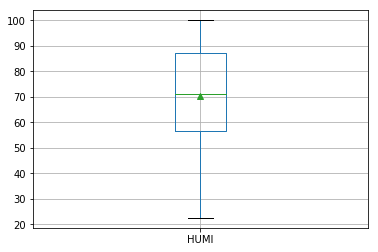

In [70]:
#for HUMI make boxplot
f.boxplot(column='HUMI',showmeans=True)

/Users/tangxinjie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


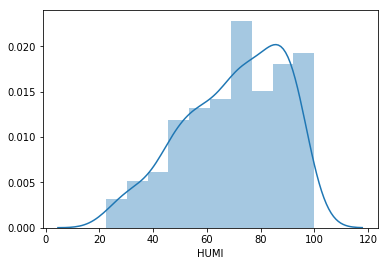

In [71]:
sb.distplot(f.HUMI)

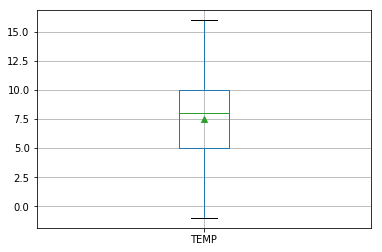

In [72]:
# for PM_Jingan
f.boxplot(column='TEMP',showmeans=True,sym='r+')

/Users/tangxinjie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


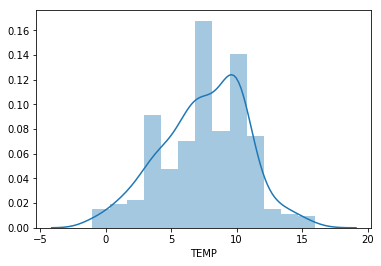

In [73]:
sb.distplot(f.TEMP)

In [89]:
# do simple regression for TEMP(DV) and HUMI(IV)
X=f[['HUMI']]
Y=f[['TEMP']]
lr=LR()
lr.fit(X,Y)
Y_predict=lr.predict(X)

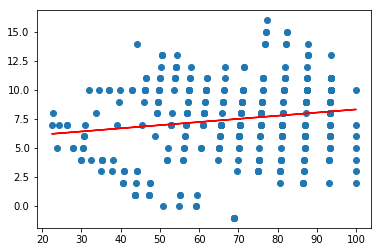

In [93]:
# visual result
plt.scatter(X,Y)
plt.plot(X,Y_predict,color='red')
plt.show()
